# Multilingual Sentiment Analysis

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import string
import re
import tensorflow_hub as hub
import tensorflow_text as text
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.tokenize import sent_tokenize

2023-07-10 10:44:19.226076: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


1) Sets up a deep learning model using Keras, consisting of an embedding layer, convolutional layer, global max pooling layer, and a dense layer, for text classification. This model architecture is commonly used for text classification tasks.

2) Also imports other classification algorithms such as MultinomialNB, SVC, and LogisticRegression from scikit-learn, which can be used as alternative models for text classification.

3) Utilizes various text preprocessing techniques, such as removing punctuation, tokenization, removing stopwords, and converting text data into numerical representations using CountVectorizer and Tokenizer.

4) Additionally, the code splits the dataset into training and testing sets using train_test_split and evaluates the accuracy of the classification models using accuracy_score.

### Load the dataset

In [2]:
df = pd.read_csv('jigsaw-toxic-comment-train-processed-seqlen128.csv')

In [3]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,input_word_ids,input_mask,all_segment_id
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,"(101, 27746, 31609, 11809, 24781, 10105, 70971...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,"(101, 141, 112, 56237, 10874, 106, 10357, 1825...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,"(101, 35936, 10817, 117, 146, 112, 181, 30181,...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,"(101, 107, 15946, 146, 10944, 112, 188, 13086,...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,"(101, 11065, 117, 52523, 117, 10301, 15127, 51...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


Observation :
    
Columns
id - identifier within each file.
comment_text - the text of the comment to be classified.
lang - the language of the comment.
toxic - whether or not the comment is classified as toxic. (Does not exist in test.csv.) 

### Data description

In [4]:
df.shape

(223549, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223549 entries, 0 to 223548
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              223549 non-null  object
 1   comment_text    223549 non-null  object
 2   toxic           223549 non-null  int64 
 3   severe_toxic    223549 non-null  int64 
 4   obscene         223549 non-null  int64 
 5   threat          223549 non-null  int64 
 6   insult          223549 non-null  int64 
 7   identity_hate   223549 non-null  int64 
 8   input_word_ids  223549 non-null  object
 9   input_mask      223549 non-null  object
 10  all_segment_id  223549 non-null  object
dtypes: int64(6), object(5)
memory usage: 18.8+ MB


In [6]:
df.isnull()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,input_word_ids,input_mask,all_segment_id
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
223544,False,False,False,False,False,False,False,False,False,False,False
223545,False,False,False,False,False,False,False,False,False,False,False
223546,False,False,False,False,False,False,False,False,False,False,False
223547,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,223549.000000,223549.000000,223549.000000,223549.000000,223549.000000,223549.000000
mean,0.095657,0.008777,0.054306,0.003082,0.050566,0.009470
std,0.294121,0.093272,0.226621,0.055431,0.219110,0.096852
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
df.shape

(223549, 11)

There are total 223549 data with 11 features

In [8]:
df_final = df.head(10000)

In [9]:
df_final

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,input_word_ids,input_mask,all_segment_id
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,"(101, 27746, 31609, 11809, 24781, 10105, 70971...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,"(101, 141, 112, 56237, 10874, 106, 10357, 1825...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,"(101, 35936, 10817, 117, 146, 112, 181, 30181,...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,"(101, 107, 15946, 146, 10944, 112, 188, 13086,...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,"(101, 11065, 117, 52523, 117, 10301, 15127, 51...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...
9995,1a790ff1007a10e3,Numbers may be either listed separately at the...,0,0,0,0,0,0,"(101, 51409, 11387, 10347, 16106, 17585, 91614...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9996,1a7a4868968e2b9e,"Those two love to disagree, don't they? 206.17...",0,0,0,0,0,0,"(101, 43027, 10551, 16138, 10114, 36474, 91479...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9997,1a7c3bec9a71415d,"""I have changed """"Lance Thomas"""" to """"Lance Th...",0,0,0,0,0,0,"(101, 107, 146, 10529, 17695, 107, 107, 45013,...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9998,1a7c9c14b0cf0fe0,states \n\nCourts: I have been putting all art...,0,0,0,0,0,0,"(101, 16316, 14100, 10107, 131, 146, 10529, 10...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


Observation : first 1000 data of the dataset

### Data Preprocessing

#### Remove stop words

In [10]:
# Download the stopwords 
nltk.download('stopwords')

# Function to remove stop words from a text
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply stop word removal to the 'comment_text' column
df['comment_text'] = df['comment_text'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/c100-122/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1) It starts by downloading the required stopwords from the NLTK library using nltk.download('stopwords'). Stop words are commonly occurring words (e.g., "the," "and," "is") that do not contribute much to the overall meaning of the text.

2) The remove_stopwords function is defined, which takes a text input and removes the stop words from it. It utilizes the NLTK library's set of English stop words obtained through stopwords.words('english').

3) Inside the function, the input text is split into individual words. Then, a list comprehension is used to filter out the stop words by checking if each word (converted to lowercase) is present in the set of stop words.

4) Finally, the filtered words are joined back together using ' '.join(filtered_words) to form a sentence without the stop words. This modified text is then assigned back to the 'comment_text' column of the DataFrame, effectively removing the stop words.

In [11]:
df.head(2)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,input_word_ids,input_mask,all_segment_id
0,0000997932d777bf,Explanation edits made username Hardcore Metal...,0,0,0,0,0,0,"(101, 27746, 31609, 11809, 24781, 10105, 70971...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,000103f0d9cfb60f,D'aww! matches background colour I'm seemingly...,0,0,0,0,0,0,"(101, 141, 112, 56237, 10874, 106, 10357, 1825...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


#### Remove punctuation

In [12]:
# Function to remove punctuation from a text
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

# Apply stop word removal and punctuation removal to the 'comment_text' column
df['comment_text'] = df['comment_text'].apply(remove_punctuation)

The written code defines a function called remove_punctuation that takes a text as input and removes any punctuation characters from it using the str.maketrans() and translate() methods.

After defining the function, it applies the remove_punctuation function to the 'comment_text' column of a DataFrame named df. This column presumably contains text data that needs to be preprocessed by removing punctuation.

By removing punctuation from the text data, the code aims to clean the text and remove any punctuation marks that might not contribute significantly to the analysis or modeling tasks.

In [13]:
df.head(2)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,input_word_ids,input_mask,all_segment_id
0,0000997932d777bf,Explanation edits made username Hardcore Metal...,0,0,0,0,0,0,"(101, 27746, 31609, 11809, 24781, 10105, 70971...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,000103f0d9cfb60f,Daww matches background colour Im seemingly st...,0,0,0,0,0,0,"(101, 141, 112, 56237, 10874, 106, 10357, 1825...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


#### Remove numbers

In [14]:
# Function to remove stop words and numbers from a text
def remove_stopwords_numbers(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words and not re.match(r'\d+', word)]
    return ' '.join(filtered_words)

# Apply stop word and number removal to the 'comment_text' column
df['comment_text'] = df['comment_text'].apply(remove_stopwords_numbers)

1)PThe function takes a text as input.

2)It initializes a set of English stopwords using stopwords.words('english') from the NLTK library.

3)The text is split into individual words using the split() method.

4)The function creates a new list filtered_words that includes only those words which are not in the stop words set (word.lower() not in stop_words) and do not match the pattern of a number (not re.match(r'\d+', word)).

5)Finally, the filtered words are joined back together into a string using ' '.join(filtered_words) and returned as the result.

In [15]:
df.head(2)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,input_word_ids,input_mask,all_segment_id
0,0000997932d777bf,Explanation edits made username Hardcore Metal...,0,0,0,0,0,0,"(101, 27746, 31609, 11809, 24781, 10105, 70971...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,000103f0d9cfb60f,Daww matches background colour Im seemingly st...,0,0,0,0,0,0,"(101, 141, 112, 56237, 10874, 106, 10357, 1825...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


#### Tokenize the data and convert them into sentence

In [16]:
nltk.download('punkt')

# Function to remove stop words and numbers from a text, tokenize it into sentences
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    sentences = sent_tokenize(text)
    tokenized_sentences = []
    for sentence in sentences:
        words = nltk.word_tokenize(sentence)
        filtered_words = [word for word in words if word.lower() not in stop_words]
        tokenized_sentence = ' '.join(filtered_words)
        tokenized_sentences.append(tokenized_sentence)
    return tokenized_sentences

# Apply text preprocessing to the 'comment_text' column
df['comment_text'] = df['comment_text'].apply(preprocess_text)


[nltk_data] Downloading package punkt to /Users/c100-122/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


The written code includes a function called preprocess_text that performs text preprocessing on the 'comment_text' column of a DataFrame named df. The function removes stop words and numbers from the text, tokenizes it into sentences using the sent_tokenize function from NLTK, and then tokenizes each sentence into words using the word_tokenize function. It filters out stop words from the words list and joins the filtered words back into a tokenized sentence. The function returns a list of tokenized sentences.

To use this function, the NLTK package needs to be downloaded by running nltk.download('punkt').

The code applies the preprocess_text function to the 'comment_text' column of the DataFrame df by using the apply method. This ensures that text preprocessing is performed on each comment in the 'comment_text' column.

In [17]:
df.head(2)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,input_word_ids,input_mask,all_segment_id
0,0000997932d777bf,[Explanation edits made username Hardcore Meta...,0,0,0,0,0,0,"(101, 27746, 31609, 11809, 24781, 10105, 70971...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,000103f0d9cfb60f,[Daww matches background colour Im seemingly s...,0,0,0,0,0,0,"(101, 141, 112, 56237, 10874, 106, 10357, 1825...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


### Word Embeddings

In [18]:
df_final[['comment_text','input_word_ids']]

,comment_text,input_word_ids
0,Explanation\nWhy the edits made under my usern...,"(101, 27746, 31609, 11809, 24781, 10105, 70971..."
1,D'aww! He matches this background colour I'm s...,"(101, 141, 112, 56237, 10874, 106, 10357, 1825..."
2,"Hey man, I'm really not trying to edit war. It...","(101, 35936, 10817, 117, 146, 112, 181, 30181,..."
3,"""\nMore\nI can't make any real suggestions on ...","(101, 107, 15946, 146, 10944, 112, 188, 13086,..."
4,"You, sir, are my hero. Any chance you remember...","(101, 11065, 117, 52523, 117, 10301, 15127, 51..."
...,...,...
9995,Numbers may be either listed separately at the...,"(101, 51409, 11387, 10347, 16106, 17585, 91614..."
9996,"Those two love to disagree, don't they? 206.17...","(101, 43027, 10551, 16138, 10114, 36474, 91479..."
9997,"""I have changed """"Lance Thomas"""" to """"Lance Th...","(101, 107, 146, 10529, 17695, 107, 107, 45013,..."
9998,states \n\nCourts: I have been putting all art...,"(101, 16316, 14100, 10107, 131, 146, 10529, 10..."


Word embeddings are vector representations of words that capture semantic and syntactic information.
They map words to dense numerical vectors in a continuous space, where similar words have similar vector representations.
Word2Vec and GloVe are popular methods for generating word embeddings.
Word embeddings enable algorithms to leverage the meaning and relationships between words for natural language processing tasks.
They have revolutionized the field by improving performance in tasks such as text classification, information retrieval, and machine translation.

### Model Building

#### Train test split

In [19]:
df_final.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate', 'input_word_ids', 'input_mask',
       'all_segment_id'],
      dtype='object')

In [20]:
# Convert the 'comment_text' column to strings
df_final['comment_text'] = df_final['comment_text'].astype(str)

# Extract the features and labels from the dataframe
X = df_final['comment_text']

y = df_final['toxic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (8000,) (8000,)
Testing set shape: (2000,) (2000,)


/var/folders/cn/x21hwpy15_9b8f17160b3tvr0000gn/T/ipykernel_2465/691524635.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['comment_text'] = df_final['comment_text'].astype(str)


In [21]:
X_train

9254    "\n\n Theme song? \n\nI have been watching CNN...
1561    "==:Bluffview Montessori School==\nA tag has b...
1670    If you doubt that it's verifiable, you haven't...
6087    "\n\n Wester Civ \n\nHello,\n  I had gotten an...
6669    ")\n\nreplied  talk \nPlease note that I did r...
                              ...                        
5734    I don't believe it is an attack, but a reminde...
5191    Waste dumping\nNew user  has twice removed mat...
5390    "\nI wish you another six months of happy mili...
860     "\n\n Pandur \n\nThe name derives from pandur,...
7270    )\n\nThe sources cited in the article are, and...
Name: comment_text, Length: 8000, dtype: object

In [22]:
y_train

9254    0
1561    0
1670    0
6087    0
6669    0
       ..
5734    0
5191    0
5390    0
860     0
7270    0
Name: toxic, Length: 8000, dtype: int64

##### NAIVE BYES

In [23]:
# Create an instance of the CountVectorizer class
vectorizer = CountVectorizer()

# Transform the training and testing data into feature vectors
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Create an instance of the Naive Bayes classifier (MultinomialNB)
naive_bayes = MultinomialNB()

# Train the classifier on the training data
naive_bayes.fit(X_train_vectorized, y_train)

# Make predictions on the testing data
y_pred = naive_bayes.predict(X_test_vectorized)

# Calculate and print the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9365


The provided code performs text classification using the Naive Bayes algorithm and the CountVectorizer for feature extraction.

1. It creates an instance of the CountVectorizer class, which converts text data into numerical feature vectors.
2. The training and testing data are transformed into feature vectors using the vectorizer.
3. An instance of the Naive Bayes classifier (MultinomialNB) is created.
4. The classifier is trained on the training data by fitting it to the vectorized features.
5. Predictions are made on the testing data, and the accuracy of the classifier is calculated and printed.

Overall, this code demonstrates the process of training a Naive Bayes classifier on text data represented as feature vectors and evaluating its accuracy in text classification tasks.

###### EVALUATION FOR NAIVE BYES

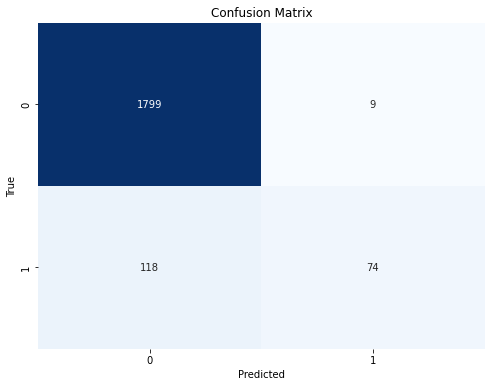

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1808
           1       0.89      0.39      0.54       192

    accuracy                           0.94      2000
   macro avg       0.92      0.69      0.75      2000
weighted avg       0.93      0.94      0.92      2000



In [24]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already trained the Naive Bayes classifier and made predictions (y_pred)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Generate classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)


1) It calculates the confusion matrix by comparing the true labels (y_test) with the predicted labels (y_pred).

2) The confusion matrix is visualized using a heatmap plot, providing an overview of the model's performance.

3) The classification report is generated, which includes metrics such as precision, recall, F1-score, and support for each class.

4) The classification report provides a comprehensive summary of the model's performance, including accuracy, precision, recall, and other metrics for each class.

5) Output of the classification report is printed, allowing for easy interpretation and evaluation of the model's classification results.

##### LOGISTIC REGRESSION

In [25]:
# Create an instance of the LogisticRegression classifier
logistic_regression = LogisticRegression()

# Train the classifier on the training data
logistic_regression.fit(X_train_vectorized, y_train)

# Make predictions on the testing data
y_pred = logistic_regression.predict(X_test_vectorized)

# Calculate and print the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.944


/Users/c100-122/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1) An instance of the LogisticRegression classifier is created.

2) The classifier is trained on the training data using the fit method.

3) Predictions are made on the testing data using the predict method.

4) The accuracy of the classifier is calculated using the accuracy_score function.

5) The accuracy is printed to evaluate the performance of the logistic regression classifier.

###### EVALUATION FOR LOGISTIC REGRESSION

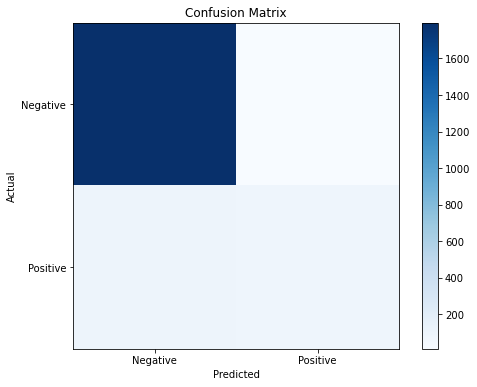

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1808
           1       0.88      0.48      0.62       192

    accuracy                           0.94      2000
   macro avg       0.92      0.74      0.80      2000
weighted avg       0.94      0.94      0.94      2000



In [26]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create classification report
report = classification_report(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print classification report
print("Classification Report:")
print(report)

1) It calculates the confusion matrix by comparing the true labels (y_test) with the predicted labels (y_pred).

2) The confusion matrix is visualized using a heatmap plot, providing an overview of the model's performance.

3) The classification report is generated, which includes metrics such as precision, recall, F1-score, and support for each class.

4) The classification report provides a comprehensive summary of the model's performance, including accuracy, precision, recall, and other metrics for each class.

5) Output of the classification report is printed, allowing for easy interpretation and evaluation of the model's classification results.


##### RANDOM FOREST 

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the Random Forest classifier
random_forest = RandomForestClassifier()

# Train the classifier on the training data
random_forest.fit(X_train_vectorized, y_train)

# Make predictions on the testing data
y_pred = random_forest.predict(X_test_vectorized)

# Calculate and print the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.928


1) It imports the RandomForestClassifier from the sklearn.ensemble module.

2) An instance of the Random Forest classifier is created.

3) The classifier is trained on the training data represented by X_train_vectorized and y_train.

4) Predictions are made on the testing data using X_test_vectorized.

5) The accuracy of the classifier is calculated and printed using accuracy_score.

###### EVALUATION FOR RANDOM FOREST

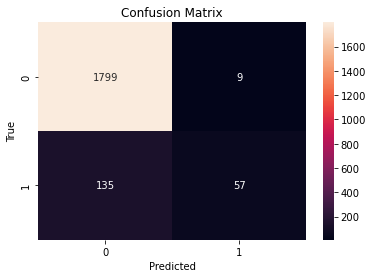

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1808
           1       0.86      0.30      0.44       192

    accuracy                           0.93      2000
   macro avg       0.90      0.65      0.70      2000
weighted avg       0.92      0.93      0.91      2000



In [28]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Generate and print the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

1) It calculates the confusion matrix by comparing the true labels (y_test) with the predicted labels (y_pred).

2) The confusion matrix is visualized using a heatmap plot, providing an overview of the model's performance.

3) The classification report is generated, which includes metrics such as precision, recall, F1-score, and support for each class.

4) The classification report provides a comprehensive summary of the model's performance, including accuracy, precision, recall, and other metrics for each class.

5) Output of the classification report is printed, allowing for easy interpretation and evaluation of the model's classification results.


##### CNN

In [29]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Convert sparse matrix to dense array
X_train_dense = X_train_vectorized.toarray()
X_test_dense = X_test_vectorized.toarray()

# Get the vocabulary size
vocab_size = len(vectorizer.vocabulary_)

# Define the maximum sequence length
max_sequence_length = 100

# Pad or truncate the sequences to the defined maximum sequence length
X_train_padded = tf.keras.preprocessing.sequence.pad_sequences(X_train_dense, maxlen=max_sequence_length)
X_test_padded = tf.keras.preprocessing.sequence.pad_sequences(X_test_dense, maxlen=max_sequence_length)

# Get the number of classes
num_classes = len(set(y_train))

# Define other necessary variables (e.g., embedding_dim, num_epochs, batch_size)
embedding_dim = 100
num_epochs = 10
batch_size = 32

# Define the CNN model
model = tf.keras.Sequential()
model.add(layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_test_padded, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test)

# Print the accuracy
print("Accuracy:", accuracy)


Epoch 1/10
250/250 [==============================] - 10s 39ms/step - loss: 0.3638 - accuracy: 0.8601 - val_loss: 0.3163 - val_accuracy: 0.9040
Epoch 2/10
250/250 [==============================] - 10s 38ms/step - loss: 0.3206 - accuracy: 0.9026 - val_loss: 0.3191 - val_accuracy: 0.9040
Epoch 3/10
250/250 [==============================] - 10s 38ms/step - loss: 0.3205 - accuracy: 0.9026 - val_loss: 0.3192 - val_accuracy: 0.9040
Epoch 4/10
250/250 [==============================] - 10s 38ms/step - loss: 0.3201 - accuracy: 0.9026 - val_loss: 0.3225 - val_accuracy: 0.9040
Epoch 5/10
250/250 [==============================] - 10s 38ms/step - loss: 0.3214 - accuracy: 0.9026 - val_loss: 0.3163 - val_accuracy: 0.9040
Epoch 6/10
250/250 [==============================] - 9s 38ms/step - loss: 0.3204 - accuracy: 0.9026 - val_loss: 0.3161 - val_accuracy: 0.9040
Epoch 7/10
250/250 [==============================] - 9s 38ms/step - loss: 0.3202 - accuracy: 0.9026 - val_loss: 0.3203 - val_accuracy: 0

1) The code converts the sparse matrix representations of the training and testing data into dense arrays using toarray().

2) It determines the vocabulary size based on the vectorizer used for feature extraction.

3) The sequences of the dense data are padded or truncated to a specified maximum sequence length using pad_sequences().

4) The CNN model is defined with embedding, convolutional, pooling, and dense layers.

5) The model is compiled, trained on the padded training data, evaluated on the padded testing data, and the resulting accuracy is printed.

###### EVALUATION FOR CNN

63/63 [==============================] - 0s 1ms/step
Confusion Matrix:
[[1808    0]
 [ 192    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1808
           1       0.00      0.00      0.00       192

    accuracy                           0.90      2000
   macro avg       0.45      0.50      0.47      2000
weighted avg       0.82      0.90      0.86      2000



/Users/c100-122/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/c100-122/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/c100-122/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


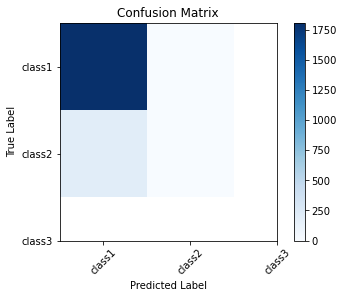

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Define the class names based on your dataset
class_names = ["class1", "class2", "class3"]  # Replace with your actual class names

# Make predictions on the test data
y_pred_prob = model.predict(X_test_padded)
y_pred = np.argmax(y_pred_prob, axis=1)

# Convert the predicted labels to a numpy array
y_pred = np.array(y_pred)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Generate the classification report
classification_rep = classification_report(y_test, y_pred)

# Print the confusion matrix and classification report
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_rep)

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


1) It calculates the confusion matrix by comparing the true labels (y_test) with the predicted labels (y_pred).

2) The confusion matrix is visualized using a heatmap plot, providing an overview of the model's performance.

3) The classification report is generated, which includes metrics such as precision, recall, F1-score, and support for each class.

4) The classification report provides a comprehensive summary of the model's performance, including accuracy, precision, recall, and other metrics for each class.

5) Output of the classification report is printed, allowing for easy interpretation and evaluation of the model's classification results.


##### RNN

In [31]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Convert sparse matrix to dense array
X_train_dense = X_train_vectorized.toarray()
X_test_dense = X_test_vectorized.toarray()

# Get the vocabulary size
vocab_size = len(vectorizer.vocabulary_)

# Define the maximum sequence length
max_sequence_length = 100

# Pad or truncate the sequences to the defined maximum sequence length
X_train_padded = tf.keras.preprocessing.sequence.pad_sequences(X_train_dense, maxlen=max_sequence_length)
X_test_padded = tf.keras.preprocessing.sequence.pad_sequences(X_test_dense, maxlen=max_sequence_length)

# Get the number of classes
num_classes = len(set(y_train))

# Define other necessary variables (e.g., embedding_dim, num_epochs, batch_size)
embedding_dim = 100
num_epochs = 20
batch_size = 32

# Define the RNN model
model = tf.keras.Sequential()
model.add(layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(layers.SimpleRNN(128))
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_test_padded, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test)

# Print the accuracy
print("Accuracy:", accuracy)


Epoch 1/20
250/250 [==============================] - 11s 42ms/step - loss: 0.3333 - accuracy: 0.8934 - val_loss: 0.3210 - val_accuracy: 0.9040
Epoch 2/20
250/250 [==============================] - 10s 42ms/step - loss: 0.3221 - accuracy: 0.9026 - val_loss: 0.3196 - val_accuracy: 0.9040
Epoch 3/20
250/250 [==============================] - 10s 41ms/step - loss: 0.3223 - accuracy: 0.9026 - val_loss: 0.3228 - val_accuracy: 0.9040
Epoch 4/20
250/250 [==============================] - 10s 41ms/step - loss: 0.3222 - accuracy: 0.9026 - val_loss: 0.3171 - val_accuracy: 0.9040
Epoch 5/20
250/250 [==============================] - 10s 41ms/step - loss: 0.3215 - accuracy: 0.9026 - val_loss: 0.3162 - val_accuracy: 0.9040
Epoch 6/20
250/250 [==============================] - 10s 41ms/step - loss: 0.3230 - accuracy: 0.9025 - val_loss: 0.3177 - val_accuracy: 0.9040
Epoch 7/20
250/250 [==============================] - 10s 41ms/step - loss: 0.3213 - accuracy: 0.9026 - val_loss: 0.3166 - val_accuracy:

1) The sequences are padded or truncated to a maximum sequence length using pad_sequences from TensorFlow.

2) The RNN model is defined using Sequential from TensorFlow's keras module, comprising an embedding layer, a simple RNN layer, and dense layers.

###### EVALUATION FOR RNN

63/63 [==============================] - 0s 3ms/step


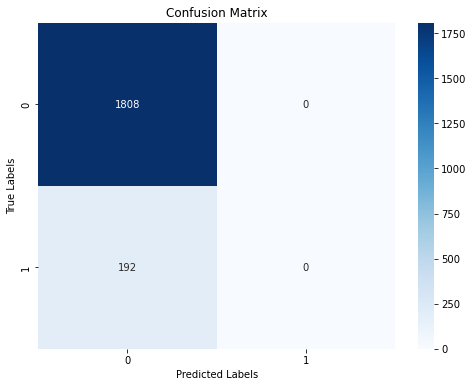

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1808
           1       0.00      0.00      0.00       192

    accuracy                           0.90      2000
   macro avg       0.45      0.50      0.47      2000
weighted avg       0.82      0.90      0.86      2000



/Users/c100-122/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/c100-122/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/c100-122/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Get the predicted probabilities for each class
y_pred_probs = model.predict(X_test_padded)

# Convert the predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Print the classification report
report = classification_report(y_test, y_pred_classes)
print("Classification Report:")
print(report)


1) It calculates the confusion matrix by comparing the true labels (y_test) with the predicted labels (y_pred).

2) The confusion matrix is visualized using a heatmap plot, providing an overview of the model's performance.

3) The classification report is generated, which includes metrics such as precision, recall, F1-score, and support for each class.

4) The classification report provides a comprehensive summary of the model's performance, including accuracy, precision, recall, and other metrics for each class.

5) Output of the classification report is printed, allowing for easy interpretation and evaluation of the model's classification results.


##### LSTM

In [33]:
# Get the vocabulary size
vocab_size = len(vectorizer.vocabulary_)

# Define the maximum sequence length
max_sequence_length = 100

# Pad or truncate the sequences to the defined maximum sequence length
X_train_padded = tf.keras.preprocessing.sequence.pad_sequences(X_train_dense, maxlen=max_sequence_length)
X_test_padded = tf.keras.preprocessing.sequence.pad_sequences(X_test_dense, maxlen=max_sequence_length)

# Get the number of classes
num_classes = len(set(y_train))

# Define other necessary variables (e.g., embedding_dim, num_epochs, batch_size)
embedding_dim = 100
num_epochs = 20
batch_size = 32

# Define the LSTM model
model = tf.keras.Sequential()
model.add(layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(layers.LSTM(128))
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_test_padded, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test)

# Print the accuracy
print("Accuracy:", accuracy)

2023-07-10 10:51:07.006469: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-10 10:51:07.007174: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-10 10:51:07.008613: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/20


2023-07-10 10:51:07.187043: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-10 10:51:07.188778: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-10 10:51:07.190056: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

250/250 [==============================] - ETA: 0s - loss: 0.3254 - accuracy: 0.9026

2023-07-10 10:51:25.791859: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-10 10:51:25.793060: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-10 10:51:25.794517: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

250/250 [==============================] - 20s 74ms/step - loss: 0.3254 - accuracy: 0.9026 - val_loss: 0.3177 - val_accuracy: 0.9040
Epoch 2/20
250/250 [==============================] - 18s 73ms/step - loss: 0.3204 - accuracy: 0.9026 - val_loss: 0.3176 - val_accuracy: 0.9040
Epoch 3/20
250/250 [==============================] - 18s 73ms/step - loss: 0.3204 - accuracy: 0.9026 - val_loss: 0.3180 - val_accuracy: 0.9040
Epoch 4/20
250/250 [==============================] - 18s 73ms/step - loss: 0.3199 - accuracy: 0.9026 - val_loss: 0.3177 - val_accuracy: 0.9040
Epoch 5/20
250/250 [==============================] - 18s 73ms/step - loss: 0.3198 - accuracy: 0.9026 - val_loss: 0.3176 - val_accuracy: 0.9040
Epoch 6/20
250/250 [==============================] - 18s 73ms/step - loss: 0.3204 - accuracy: 0.9026 - val_loss: 0.3165 - val_accuracy: 0.9040
Epoch 7/20
250/250 [==============================] - 18s 73ms/step - loss: 0.3205 - accuracy: 0.9026 - val_loss: 0.3224 - val_accuracy: 0.9040
Epo

1) It prepares the input data by determining the vocabulary size and maximum sequence length, and padding or truncating the sequences to a consistent length.

2) The number of classes is determined based on the unique labels in the training set.

3) A sequential model is defined using TensorFlow's Keras API, consisting of an embedding layer, LSTM layer, and dense layers.

4) The model is compiled with appropriate loss function, optimizer, and evaluation metrics.

5) The model is trained using the training data, and its performance is evaluated on the test data by calculating the loss and accuracy. The accuracy is then printed.

###### EVALUATION FOR LSTM

 6/63 [=>............................] - ETA: 0s 

2023-07-10 10:57:14.144626: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-10 10:57:14.145820: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-10 10:57:14.147293: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

63/63 [==============================] - 1s 11ms/step


/Users/c100-122/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/c100-122/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/c100-122/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


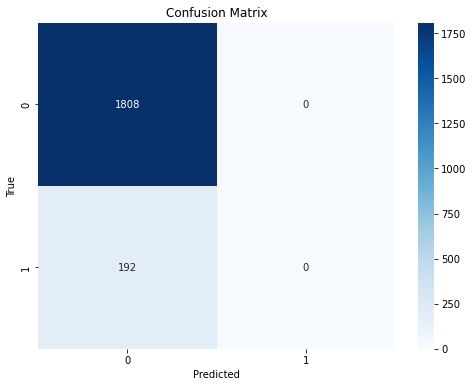

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1808
           1       0.00      0.00      0.00       192

    accuracy                           0.90      2000
   macro avg       0.45      0.50      0.47      2000
weighted avg       0.82      0.90      0.86      2000



In [34]:
import numpy as np

# Make predictions on the test data
y_pred_prob = model.predict(X_test_padded)
y_pred = np.argmax(y_pred_prob, axis=1)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a classification report
report = classification_report(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Print the classification report
print("Classification Report:")
print(report)


1) It calculates the confusion matrix by comparing the true labels (y_test) with the predicted labels (y_pred).

2) The confusion matrix is visualized using a heatmap plot, providing an overview of the model's performance.

3) The classification report is generated, which includes metrics such as precision, recall, F1-score, and support for each class.

4) The classification report provides a comprehensive summary of the model's performance, including accuracy, precision, recall, and other metrics for each class.

5) Output of the classification report is printed, allowing for easy interpretation and evaluation of the model's classification results.

### Handling imblanced data

#### OVER RESAMPLING  : RANDOM OVER SAMPLING

In [35]:
from collections import Counter
print(sorted(Counter(df_final['toxic']).items()))

[(0, 9029), (1, 971)]


In [36]:
count_class_0, count_class_1 = df_final.toxic.value_counts()

df_class_0 = df_final[df_final['toxic']==0]
df_class_1 = df_final[df_final['toxic']==1]

In [37]:
print(df_final.columns)


Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate', 'input_word_ids', 'input_mask',
       'all_segment_id'],
      dtype='object')


In [38]:
count_class_0, count_class_1 = df_final['toxic'].value_counts()

df_class_0 = df_final[df_final['toxic'] == 0]
df_class_1 = df_final[df_final['toxic'] == 1]

df_class_1_over = df_class_1.sample(count_class_0, replace=True, random_state=42)

df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)
print('Random oversampling:')
print(df_test_over['toxic'].value_counts())

Random oversampling:
0    9029
1    9029
Name: toxic, dtype: int64


1) The code first counts the occurrences of class 0 and class 1 in the 'toxic' column of the DataFrame 'df_final'.

2) Two new DataFrames, 'df_class_0' and 'df_class_1', are created by filtering 'df_final' based on the 'toxic' column values.

3) The code randomly oversamples the minority class (class 1) by sampling from 'df_class_1' with replacement to match the count of the majority class (class 0).

4) The oversampled DataFrames 'df_class_1_over' and 'df_class_0' are concatenated along the rows axis using 'pd.concat' to create a new DataFrame, 'df_test_over', which contains a balanced distribution of classes.

5) The code prints the value counts of the 'toxic' column in 'df_test_over' to show the balanced class distribution achieved through random oversampling.

### Hyperparameter Tuning

#### GRIDSEARCHCV

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score
import multiprocessing

1. It imports the necessary libraries for the random forest classifier, hyperparameter tuning, and evaluation.

2. The RandomForestClassifier is a popular ensemble learning algorithm for classification tasks.

3. GridSearchCV/RandomizedSearchCV are used to systematically search and evaluate the best combination of hyperparameters for the random forest model.

4. The accuracy_score function is used to evaluate the model's performance based on the predicted and true labels.

5. The code employs multiprocessing to speed up the hyperparameter search process by leveraging multiple CPU cores if available.

In [ ]:
rf_clf = RandomForestClassifier(random_state=10)

hyp = {"n_estimators" : np.arange(10,200),
    "criterion" : ['gini', "entropy"],
    "max_depth" :  np.arange(5,15),
    "min_samples_split": np.arange(5,20),
    "min_samples_leaf" : np.arange(4,15),
    "max_features" : ['sqrt']}

1. n_estimators– number of trees the algorithm builds before averaging the 
predictions.


2. max_features– maximum number of features random forest considers splitting 
a node.


3. mini_sample_leaf– determines the minimum number of leaves required to split 
an internal node. This Random Forest hyperparameter specifies the minimum 
number of samples that should be present in the leaf node after splitting a 
node. Default = 1


4. max_depth: The max_depth of a tree in Random Forest is defined as the longest 
path between the root node and the leaf node.


5. min_sample_split: Parameter that tells the decision tree in a random forest the 
minimum required number of observations in any given node to split it. Default = 2


7. criterion: The function to measure the quality of a split. Supported criteria are “gini” for 
the Gini impurity and “entropy” for the information gain for Random Forest Classifier. 
Supported criteria for Random Forest Regressor are “squared_error” or “mse” and 
“absolute_error” or “mae”

In [41]:
rscv_rf_clf = RandomizedSearchCV(rf_clf, hyp, cv=6)
rscv_rf_clf.fit(X_train_vectorized,y_train)
rscv_rf_clf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_leaf=13,
                       min_samples_split=7, n_estimators=148, random_state=10)

In [42]:
rf_model = RandomForestClassifier(criterion='entropy', max_depth=14, min_samples_leaf=7,
                       min_samples_split=13, n_estimators=145, random_state=10)
rf_model.fit(X_train_vectorized,y_train)

RandomForestClassifier(criterion='entropy', max_depth=14, min_samples_leaf=7,
                       min_samples_split=13, n_estimators=145, random_state=10)

In [43]:
# Training Evaluation

y_pred = rf_model.predict(X_train_vectorized)

acc_score = accuracy_score(y_train,y_pred)
print("Accuracy Score Traning :", acc_score)

cnf_matrix = confusion_matrix(y_train,y_pred)
print("Confusion Matrix Traning : \n", cnf_matrix)

class_report = classification_report(y_train,y_pred)
print("Classification Report :\n", class_report)

# Testing Evaluation

y_pred = rf_model.predict(X_test_vectorized)

acc_score = accuracy_score(y_test,y_pred)
print("Accuracy Score Testing :", acc_score)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix Testing : \n", cnf_matrix)

class_report = classification_report(y_test,y_pred)
print("Classification Report :\n", class_report)

Accuracy Score Traning : 0.902625
Confusion Matrix Traning : 
 [[7221    0]
 [ 779    0]]
Classification Report :
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      7221
           1       0.00      0.00      0.00       779

    accuracy                           0.90      8000
   macro avg       0.45      0.50      0.47      8000
weighted avg       0.81      0.90      0.86      8000

Accuracy Score Testing : 0.904
Confusion Matrix Testing : 
 [[1808    0]
 [ 192    0]]
Classification Report :
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      1808
           1       0.00      0.00      0.00       192

    accuracy                           0.90      2000
   macro avg       0.45      0.50      0.47      2000
weighted avg       0.82      0.90      0.86      2000



/Users/c100-122/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/c100-122/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/c100-122/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/c10

1) The code first uses the trained random forest model to make predictions on the training data and calculates the accuracy score using the accuracy_score function.

2) It then computes the confusion matrix using the confusion_matrix function to evaluate the performance of the model on the training data.

3) Next, the code generates a classification report using the classification_report function, which provides metrics such as precision, recall, and F1-score for each class in the training data.

4) The same evaluation process is repeated for the testing data by making predictions using the trained model, calculating the accuracy score, generating the confusion matrix, and producing a classification report.

5) The printed output includes the accuracy scores, confusion matrices, and classification reports for both the training and testing data, allowing for the assessment of the model's performance on different datasets.

In [44]:
rf_model.n_estimators

145

In [45]:
rf_model.feature_importances_

array([0., 0., 0., ..., 0., 0., 0.])

In [46]:
# Calculate the accuracy of the model on the test data
accuracy = rf_model.score(X_test_vectorized, y_test)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.904
